<a href="https://colab.research.google.com/github/simoneminorr/wrangling_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [66]:
! git clone https://github.com/ds3001f25/wrangling_assignment.git

Cloning into 'wrangling_assignment'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 8 (from 1)
Receiving objects: 100% (11/11), 5.83 MiB | 11.97 MiB/s, done.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Uploading the airbnb csv

airbnb = pd.read_csv('./data/airbnb_hw.csv')

In [ ]:
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

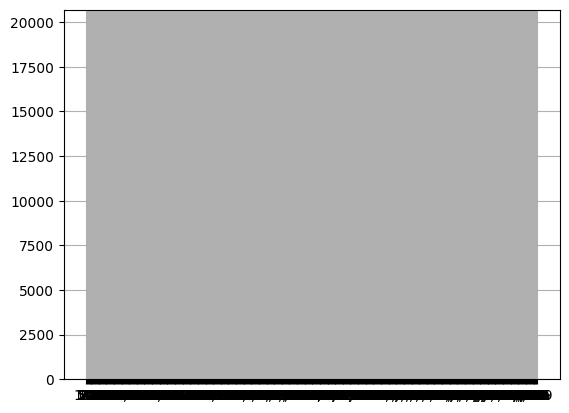

In [ ]:
var = 'Price' # A numeric variable
print(airbnb[var].unique(),'\n') # Any problem values?
print(airbnb[var].hist(), '\n') # This does not look very good.
print(airbnb[var].isna().sum(),'\n') # Any missing values?

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 



<Axes: >

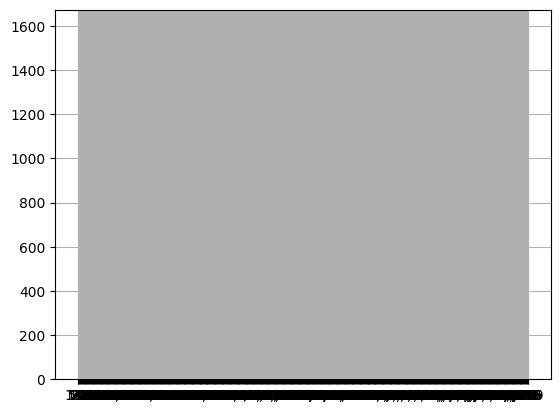

In [ ]:
print('Before coercion: \n', airbnb[var].describe(),'\n') # The age variable is not read by Pandas as a number
airbnb[var].hist(bins=300) # Initial histogram; check out the x axis

In [ ]:
#df[var].str.replace(pattern, replacement)
price= airbnb[var].str.replace(",", "")
print(price)
price= airbnb[var].str.replace("$", "")
print(price)

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: object
0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: object


After coercion: 
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64 

Total Missings: 
 181 



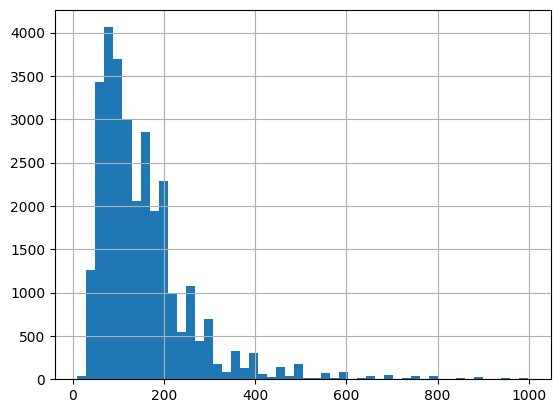

In [ ]:
# How to coerce a variable to numeric:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
airbnb['Price_nan'] = airbnb['Price'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', airbnb['Price'].describe(),'\n') # Describe the numeric variable
airbnb['Price'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(airbnb['Price_nan']),'\n') # How many missing values are there? A: 181

In [ ]:
airbnb['Price_na'] = airbnb['Price'].isnull() # Equals 1 if missing, 0 if non-null

# Compute the value to impute, in this case the median:
impute_value = airbnb['Price'].median() # Or mean, or whatever

# Impute the median of the non-missing data:
airbnb['Price_impute'] = airbnb['Price'].fillna(impute_value)

In [ ]:
policeforce = pd.read_csv('./data/mn_police_use_of_force.csv')
policeforce.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
catvar = 'subject_injury' # A categorical variable
print(policeforce[catvar].unique(), '\n') # A Categorical Example
policeforce[catvar] = policeforce[catvar].replace(' ',np.nan) # Notice the column replacement
print(policeforce[catvar].value_counts(), '\n')

[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 



In [ ]:
policeforce_ct = pd.get_dummies(policeforce['subject_injury']) # This helps with intuition
policeforce_ct.head()

,No,Yes
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [ ]:
policeforce_ct = pd.get_dummies(policeforce['subject_injury'], drop_first=True, dtype=int) # This is how we typically want the results
policeforce_ct.head() # Which category was dropped? Is that ideal?

,Yes
0,0
1,0
2,0
3,0
4,0


In [ ]:
print(policeforce['subject_injury'].value_counts(), '\n') # How many injuries or non-injuries?
conditional = (policeforce['subject_injury']=='F') # Conditional: There was no injury
print(conditional.value_counts(), '\n') # Counts for the conditional variable: 7029 True

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

subject_injury
False    12925
Name: count, dtype: int64 



In [ ]:
pd.crosstab(policeforce['subject_injury'], policeforce['force_type']) # Notice the use of pd. and not df.

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


In [ ]:
policeforce['subject_injury_NA'] = policeforce['subject_injury'].isnull()
print(pd.crosstab(policeforce['subject_injury_NA'],policeforce['force_type']),'\n') # Not very illuminating

force_type         Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_NA                                                    
False                  2          2379                172        2   
True                   2          7051               1421        0   

force_type         Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_NA                                                      
False                             77                 74            0   
True                              27                 74           87   

force_type         Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury_NA                                                        
False                                   3                            0   
True                                    0                          170   

force_type         Police K9 Bite  Taser  
subject_injury_NA                         
False                          46    322  
True

In [ ]:
justice = pd.read_parquet('./data/justice_data.parquet')
justice.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [ ]:
var2 = 'WhetherDefendantWasReleasedPretrial' #
print(justice[var2].unique(), '\n') # A Categorical Example
justice[var2] = justice[var2].replace(' ',np.nan) # Notice the column replacement
print(justice[var2].value_counts(), '\n')

[9 0 1] 

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 



In [ ]:
var2 = 'WhetherDefendantWasReleasedPretrial' # A Dummy Example
print(justice[var2].unique(), '\n')
justice[var2] = justice[var2].replace([9],np.nan)
print(justice[var2].value_counts())

[9 0 1] 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64


In [ ]:
var3 = 'ImposedSentenceAllChargeInContactEvent' # A Categorical Example
print(justice[var3].unique(), '\n') #Notice a ' ' value
justice[var3] = justice[var3].replace(' ',np.nan) # Notice the column replacement
print(justice[var3].value_counts(), '\n')

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

In [ ]:
justice['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()
SentType = justice['SentenceTypeAllChargesAtConvictionInContactEvent']
print(SentType.unique())

[9 0 1 4 2]


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [77]:
import requests
from io import BytesIO
url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
response = requests.get(url)
print(response)
sharkattack = pd.read_excel(BytesIO(response.content), engine='xlrd')
sharkattack.head()

<Response [200]>


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
sharkattack = pd.read_excel("GSAF5.xls")
sharkattack.head()

FileNotFoundError: [Errno 2] No such file or directory: 'GSAF5.xls'